# 原始数据分布

#### 画图具体分析一下乘客的属性和具体的获救情况

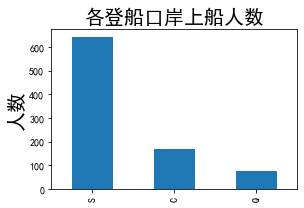

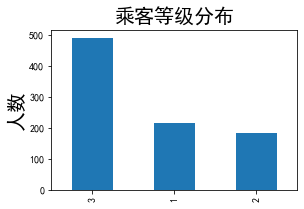

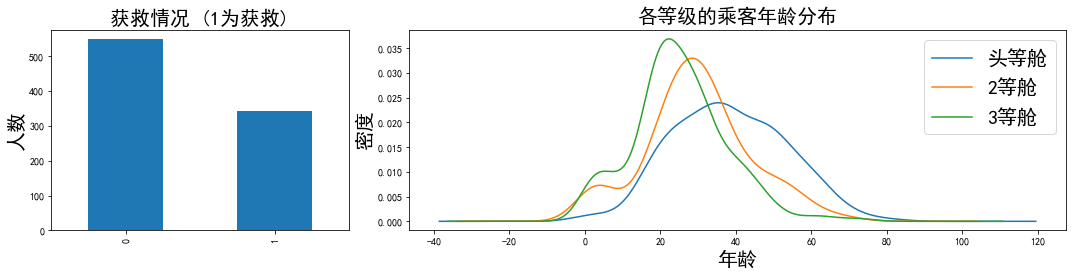

In [121]:
import pandas as pd
import matplotlib.pyplot as plt
titanic = pd.read_csv("D:\\liuchaochao\\桌面\\大三上\\泰坦尼克实验\\train.csv")

plt.rcParams['font.sans-serif']=['SimHei']    # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False    # 用来正常显示负号

fig = plt.figure(figsize=(15,10))#设置图片尺寸
plt.subplot2grid((3,3),(2,2))
titanic.Embarked.value_counts().plot(kind='bar')
plt.title("各登船口岸上船人数",fontsize=20)
plt.ylabel("人数",fontsize=20)

fig = plt.figure(figsize=(15,10))
plt.subplot2grid((3,3),(2,2))
titanic.Pclass.value_counts().plot(kind="bar")
plt.ylabel("人数",fontsize=20)
plt.title("乘客等级分布",fontsize=20)

fig = plt.figure(figsize=(15,10))
plt.subplot2grid((3,3),(1,0))
titanic.Survived.value_counts().plot(kind='bar')
plt.title("获救情况 (1为获救)",fontsize=20)
plt.ylabel("人数",fontsize=20)


plt.subplot2grid((3,3),(1,1), colspan=2)
titanic.Age[titanic.Pclass == 1].plot(kind='kde')
titanic.Age[titanic.Pclass == 2].plot(kind='kde')
titanic.Age[titanic.Pclass == 3].plot(kind='kde')
plt.xlabel("年龄",fontsize=20)
plt.ylabel("密度",fontsize=20)
plt.title("各等级的乘客年龄分布",fontsize=20)
plt.legend(('头等舱', '2等舱','3等舱'),loc='best',fontsize=20)#图例 


plt.tight_layout()#行间距自动调整
plt.show()

# 数据预处理:填充缺失值

#### 将train和test合并,填充缺失值,最后再分离

In [5]:
train = pd.read_csv("D:\\liuchaochao\\桌面\\大三上\\泰坦尼克实验\\train.csv")
test= pd.read_csv("D:\\liuchaochao\\桌面\\大三上\\泰坦尼克实验\\test.csv")
print(train.shape)
print(test.shape)
full = train.append(test,ignore_index=True)
print(full.shape)
full.info()

(891, 12)
(418, 11)
(1309, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


#### 通过上面的结果发现数据总共有1390行，Age缺失了263条数据，Cabin缺失了10141条数据，
#### Survived里面有891条数据,因为只有训练数据集中才有Survived

#### 数值采用平均值填充法，最大频率填充

In [6]:
full['Age'] = full['Age'].fillna(full['Age'].mean())
full['Fare'] = full['Fare'].fillna(full['Fare'].mean())

full['Cabin'] = full['Cabin'].fillna('Unknown')

from collections import Counter
print(Counter(full['Embarked']))
full['Embarked'] = full['Embarked'].fillna('S')

Counter({'S': 914, 'C': 270, 'Q': 123, nan: 2})


In [7]:
full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1309 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1309 non-null   float64
 10  Cabin        1309 non-null   object 
 11  Embarked     1309 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


# 对某些数据One-Hot编码

#### Onehot编码，主要是采用N位状态寄存器来对N个状态进行编码，
#### 每个状态都由他独立的寄存器位，并且在任意时候只有一位有效

In [8]:
#提取sex特征值
change_sex = {'male':1,'female':0}
full['Sex'] = full['Sex'].map(change_sex)
#男1女0，map（x）函数，对每个传入数据进行x运算

#提取embarked特征值
embarkedDf = pd.DataFrame()# 存放提取后的特征值，
embarkedDf = pd.get_dummies(full['Embarked'],prefix='Embarked')
#使用get_dummies进行one-hot编码，列名前缀为Embarked
full = pd.concat([full,embarkedDf],axis = 1)
#删除原来的embarked列，加入新的onehot编码列
full.drop('Embarked',axis=1,inplace=True)

#提取pclass特征值
pclassDf = pd.DataFrame()
pclassDf = pd.get_dummies(full['Pclass'],prefix='Pclass')
# 添加one-hot编码产生的虚拟变量到泰坦尼克号数据集full
full = pd.concat([full,pclassDf],axis = 1)
# 删除（Pclass）这一列
full.drop('Pclass',axis=1,inplace=True)
#full.head()

#提取cabin特征值
full['Name'].head()
cabinDf = pd.DataFrame()
#客舱号的类别值是首字母
full['Cabin'] = full['Cabin'].map(lambda c:c[0]) # 定义匿名函数lambda，用于查找首字母
cabinDf = pd.get_dummies(full['Cabin'],prefix='Cabin')
cabinDf.head()
# 添加one-hot编码产生的虚拟变量（dummy variables）到泰坦尼克号数据集full
full = pd.concat([full,cabinDf],axis=1)
# 删除客舱号（Cabin）这一列
full.drop('Cabin',axis=1,inplace=True)
full.head()

,PassengerId,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_C,...,Pclass_3,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U
0,1,0.0,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,0,...,1,0,0,0,0,0,0,0,0,1
1,2,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,1,...,0,0,0,1,0,0,0,0,0,0
2,3,1.0,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,0,...,1,0,0,0,0,0,0,0,0,1
3,4,1.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,0,...,0,0,0,1,0,0,0,0,0,0
4,5,0.0,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,0,...,1,0,0,0,0,0,0,0,0,1


In [9]:
#对名字提取头衔并归类

#定义函数： 从姓名中获取头衔# split()通过指定分隔符对字符串进行切片
def getTitle(name):           # Braund, Mr. Owen Harris
    str1 = name.split(',')[1] # Mr. Owen Harris...
    str2 = str1.split('.')[0] # Mr
    # strip()方法用于移除字符串头尾指定的字符（默认为空格）
    str3 = str2.strip()
    return str3
# 存放提取后的特征
titleDf = pd.DataFrame()
# map函数：对于Series每个数据应用自定义函数计算
titleDf['Title'] = full['Name'].map(getTitle)
titleDf.head()
# 姓名中头衔字符串与定义头衔类别的映射关系**
title_mapDict = {
    'Capt':        'Officer',
    'Col':         'Officer',
    'Major':       'Officer',
    'Jonkheer':    'Royalty',
    'Don':         'Royalty',
    'Sir':         'Royalty',
    'Dr':          'Officer',
    'Rev':         'Officer',
    'the Countess':'Royalty',
    'Dona':        'Royalty',
    'Mme':         'Mrs',
    'Mlle':        'Miss',
    'Ms':          'Mrs',
    'Mr':          'Mr',
    'Mrs':         'Mrs',
    'Miss':        'Miss',
    'Master':      'Master',
    'Lady':        'Royalty'

}
# map函数：对于Series每个数据应用自定义函数计算
titleDf['Title'] = titleDf['Title'].map(title_mapDict)
# 使用get_dummies进行one-hot编码
titleDf = pd.get_dummies(titleDf['Title'])
titleDf.head()
# In[22]:
# 添加one-hot编码产生的虚拟变量（dummy variables）到泰坦尼克号数据集full
full = pd.concat([full,titleDf],axis=1)
# 删除姓名（Name）这一列
full.drop('Name',axis=1,inplace=True)
full.head()

,PassengerId,Survived,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_C,Embarked_Q,...,Cabin_F,Cabin_G,Cabin_T,Cabin_U,Master,Miss,Mr,Mrs,Officer,Royalty
0,1,0.0,1,22.0,1,0,A/5 21171,7.2500,0,0,...,0,0,0,1,0,0,1,0,0,0
1,2,1.0,0,38.0,1,0,PC 17599,71.2833,1,0,...,0,0,0,0,0,0,0,1,0,0
2,3,1.0,0,26.0,0,0,STON/O2. 3101282,7.9250,0,0,...,0,0,0,1,0,1,0,0,0,0
3,4,1.0,0,35.0,1,0,113803,53.1000,0,0,...,0,0,0,0,0,0,0,1,0,0
4,5,0.0,1,35.0,0,0,373450,8.0500,0,0,...,0,0,0,1,0,0,1,0,0,0


In [10]:
#区分家庭大小类
familyDf = pd.DataFrame()
#家庭人数 = 同代直系亲属数（SibSp）+ 不同代直系亲属数（Parch）+ 乘客自己
familyDf['Familysize'] = full['SibSp'] + full['Parch'] + 1
#小 1,中2-4,大，5+
familyDf['Family_Single'] = familyDf['Familysize'].map(lambda s: 1 if s==1 else 0)
familyDf['Family_Small']  = familyDf['Familysize'].map(lambda s: 1 if 2 <= s <= 4 else 0)
familyDf['Family_Large']  = familyDf['Familysize'].map(lambda s: 1 if 5 <= s else 0)
familyDf.head()
# 添加one-hot编码产生的虚拟变量（dummy variables）到泰坦尼克号数据集full
full = pd.concat([full,familyDf],axis=1)
full.head()

,PassengerId,Survived,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_C,Embarked_Q,...,Master,Miss,Mr,Mrs,Officer,Royalty,Familysize,Family_Single,Family_Small,Family_Large
0,1,0.0,1,22.0,1,0,A/5 21171,7.2500,0,0,...,0,0,1,0,0,0,2,0,1,0
1,2,1.0,0,38.0,1,0,PC 17599,71.2833,1,0,...,0,0,0,1,0,0,2,0,1,0
2,3,1.0,0,26.0,0,0,STON/O2. 3101282,7.9250,0,0,...,0,1,0,0,0,0,1,1,0,0
3,4,1.0,0,35.0,1,0,113803,53.1000,0,0,...,0,0,0,1,0,0,2,0,1,0
4,5,0.0,1,35.0,0,0,373450,8.0500,0,0,...,0,0,1,0,0,0,1,1,0,0


In [11]:
#对年龄归类
#Child:0-6，Teenager:6-18,Youth：18-40,Middle_aged：40-60,Older:60+
ageDf = pd.DataFrame()
ageDf['Child']       = full['Age'].map(lambda a: 1 if 0 < a <= 6 else 0)
ageDf['Teenager']    = full['Age'].map(lambda a: 1 if 6 < a < 18 else 0)
ageDf['Youth']       = full['Age'].map(lambda a: 1 if 18 <= a <= 40 else 0)
ageDf['Middle_aged'] = full['Age'].map(lambda a: 1 if 40 < a <= 60 else 0)
ageDf['Older']       = full['Age'].map(lambda a: 1 if 60 < a else 0)
ageDf.head()
# 添加one-hot编码产生的虚拟变量（dummy variables）到泰坦尼克号数据集full
full = pd.concat([full,ageDf],axis=1)
# 删除年龄（Age）这一列
full.drop('Age',axis=1,inplace=True)
full.head()

,PassengerId,Survived,Sex,SibSp,Parch,Ticket,Fare,Embarked_C,Embarked_Q,Embarked_S,...,Royalty,Familysize,Family_Single,Family_Small,Family_Large,Child,Teenager,Youth,Middle_aged,Older
0,1,0.0,1,1,0,A/5 21171,7.2500,0,0,1,...,0,2,0,1,0,0,0,1,0,0
1,2,1.0,0,1,0,PC 17599,71.2833,1,0,0,...,0,2,0,1,0,0,0,1,0,0
2,3,1.0,0,0,0,STON/O2. 3101282,7.9250,0,0,1,...,0,1,1,0,0,0,0,1,0,0
3,4,1.0,0,1,0,113803,53.1000,0,0,1,...,0,2,0,1,0,0,0,1,0,0
4,5,0.0,1,0,0,373450,8.0500,0,0,1,...,0,1,1,0,0,0,0,1,0,0


# 特征提取与选择

#### 相关性矩阵，与各个特征值之间相关系数

In [12]:
corrDf = full.corr()
corrDf

corrDf['Survived'].sort_values(ascending = False)

Survived         1.000000
Mrs              0.344935
Miss             0.332795
Pclass_1         0.285904
Family_Small     0.279855
Fare             0.257307
Cabin_B          0.175095
Embarked_C       0.168240
Child            0.154447
Cabin_D          0.150716
Cabin_E          0.145321
Cabin_C          0.114652
Pclass_2         0.093349
Master           0.085221
Parch            0.081629
Cabin_F          0.057935
Royalty          0.033391
Teenager         0.023499
Cabin_A          0.022287
Familysize       0.016639
Cabin_G          0.016040
Middle_aged      0.005716
Embarked_Q       0.003650
PassengerId     -0.005007
Cabin_T         -0.026456
Officer         -0.031316
SibSp           -0.035322
Older           -0.051224
Youth           -0.076150
Family_Large    -0.125147
Embarked_S      -0.149683
Family_Single   -0.203367
Cabin_U         -0.316912
Pclass_3        -0.322308
Sex             -0.543351
Mr              -0.549199
Name: Survived, dtype: float64

In [13]:
#选取相关性大的作为特征值
full_X = pd.concat([
    titleDf,pclassDf,familyDf,full['Fare'],
    full['Sex'],cabinDf,embarkedDf
],axis=1)
full_X

,Master,Miss,Mr,Mrs,Officer,Royalty,Pclass_1,Pclass_2,Pclass_3,Familysize,...,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U,Embarked_C,Embarked_Q,Embarked_S
0,0,0,1,0,0,0,0,0,1,2,...,0,0,0,0,0,0,1,0,0,1
1,0,0,0,1,0,0,1,0,0,2,...,1,0,0,0,0,0,0,1,0,0
2,0,1,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,1,0,0,1
3,0,0,0,1,0,0,1,0,0,2,...,1,0,0,0,0,0,0,0,0,1
4,0,0,1,0,0,0,0,0,1,1,...,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,0,0,1,0,0,0,0,0,1,1,...,0,0,0,0,0,0,1,0,0,1
1305,0,0,0,0,0,1,1,0,0,1,...,1,0,0,0,0,0,0,1,0,0
1306,0,0,1,0,0,0,0,0,1,1,...,0,0,0,0,0,0,1,0,0,1
1307,0,0,1,0,0,0,0,0,1,1,...,0,0,0,0,0,0,1,0,0,1


# 构建学习模型

In [86]:
#原始训练数据有891行,所以取前891行
sourceRow = 891

source_X = full_X.loc[0:sourceRow-1,:]
source_y = full.loc[0:sourceRow-1,'Survived']

pred_X = full_X.loc[sourceRow:,:]

# 查看原始数据集有多少行
print('原始数据集有多少行：',source_X.shape[0])
# 查看预测数据集有多少行
print('预测数据集有多少行：',pred_X.shape[0])
pred_X

原始数据集有多少行： 891
预测数据集有多少行： 418


,Master,Miss,Mr,Mrs,Officer,Royalty,Pclass_1,Pclass_2,Pclass_3,Familysize,...,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U,Embarked_C,Embarked_Q,Embarked_S
891,0,0,1,0,0,0,0,0,1,1,...,0,0,0,0,0,0,1,0,1,0
892,0,0,0,1,0,0,0,0,1,2,...,0,0,0,0,0,0,1,0,0,1
893,0,0,1,0,0,0,0,1,0,1,...,0,0,0,0,0,0,1,0,1,0
894,0,0,1,0,0,0,0,0,1,1,...,0,0,0,0,0,0,1,0,0,1
895,0,0,0,1,0,0,0,0,1,3,...,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,0,0,1,0,0,0,0,0,1,1,...,0,0,0,0,0,0,1,0,0,1
1305,0,0,0,0,0,1,1,0,0,1,...,1,0,0,0,0,0,0,1,0,0
1306,0,0,1,0,0,0,0,0,1,1,...,0,0,0,0,0,0,1,0,0,1
1307,0,0,1,0,0,0,0,0,1,1,...,0,0,0,0,0,0,1,0,0,1


In [43]:
'''  
从原始数据集（source）中拆分出用于模型训练的训练数据集（train）,用于评估模型的测试数据集（test）  
train_test_split:是交叉验证中常用的函数，功能是从样本中随机按比例选取train data和test data  
train_data:所要划分的样本特征集  
train_target:所要划分的样本结果  
train_size:样本占比，如果为整数则是样本的数量  
'''

from sklearn.model_selection import train_test_split

# 建立模型所需的训练数据集和测试数据集  
train_X,test_X,train_y,test_y = train_test_split(source_X,source_y,train_size=0.8)  
# 输出数据集大小  
print('原始数据集特征',source_X.shape,  
      '训练数据集特征',train_X.shape,  
      '测试数据集特征',test_X.shape)  
print('原始数据集标签',source_y.shape,  
      '训练数据集标签',train_y.shape,  
      '测试数据集标签',test_y.shape)  



原始数据集特征 (891, 27) 训练数据集特征 (712, 27) 测试数据集特征 (179, 27)
原始数据集标签 (891,) 训练数据集标签 (712,) 测试数据集标签 (179,)


In [75]:
# 查看原始数据集标签  
source_y.head()  
# 选择机器学习算法 
# 选择k近邻算法：与未知点最近的k个已知点，判定未知点的标签
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors = 10)

# 训练模型  
model.fit(train_X,train_y)  
#epochs:迭代次数，即全部样本数据将被“轮”多少次，轮完训练停止
#verbose:0:不输出信息；1:显示进度条(一般默认为1)；2:每个epoch输出一行记录；

# 评估模型分类问题，score得到的是模型正确率  
model.score(test_X,test_y)  

0.770949720670391

In [38]:
# 使用预测数据集进行预测结果，并保存到csv文件中
# 使用机器学习模型，对预测数据集中的生存情况进行预测  
pred_y = model.predict(pred_X)  
  
# 乘客id  
passenger_id = full.loc[sourceRow:,'PassengerId'] 

# 数据框：乘客id，预测生存情况  
predDf = pd.DataFrame({'PassengerId':passenger_id, 'Survived':pred_y})  
predDf.shape  
predDf.head()  
 
# 保存结果  
predDf.to_csv('D:\\liuchaochao\\桌面\\大三上\\泰坦尼克实验\\titanic_pred.csv',index=False)  

# 评估模型

In [88]:
import sklearn
sklearn.metrics.f1_score(source_y,
                         model.predict(source_X),
                         labels=None, 
                         pos_label=1, 
                         average='binary', 
                         sample_weight=None)

0.7089430894308942